In [1]:
from keras import models
from keras import layers
from keras.datasets import imdb

Load data

In [2]:
(train_data, train_labels), (test_data, test_labels) = \
    imdb.load_data(num_words= 10000)

showing data
Decode the review

In [3]:
# print(train_data[0])
# print(train_labels[0])
# word_index = imdb.get_word_index()
# r_word_index = dict((v, k ) for k,v in word_index.items())
# decode_review = ''.join([r_word_index[word] + ' ' for word in train_data[0]])
# print(decode_review)

vectorize the sequences

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
    return result
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

Construct the Network

In [5]:
from keras import optimizers
from keras import losses, metrics
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
s_model = models.Sequential()
s_model.add(layers.Dense(4, activation='relu', input_shape = (10000,)))
s_model.add(layers.Dense(4, activation='relu'))
s_model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
L_model = models.Sequential()
L_model.add(layers.Dense(512, activation='relu', input_shape = (10000,)))
L_model.add(layers.Dense(512, activation='relu'))
L_model.add(layers.Dense(1, activation='sigmoid'))

Setting validation data

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Trainnig the model

In [9]:
s_model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001), 
              loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
s_history = s_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 50ms/step - loss: 0.6425 - binary_accuracy: 0.6852 - val_loss: 0.5868 - val_binary_accuracy: 0.8056
Epoch 2/10
30/30 [==============================] - 0s 12ms/step - loss: 0.5346 - binary_accuracy: 0.8434 - val_loss: 0.5010 - val_binary_accuracy: 0.8466
Epoch 3/10
30/30 [==============================] - 0s 13ms/step - loss: 0.4477 - binary_accuracy: 0.8797 - val_loss: 0.4323 - val_binary_accuracy: 0.8650
Epoch 4/10
30/30 [==============================] - 0s 13ms/step - loss: 0.3788 - binary_accuracy: 0.8975 - val_loss: 0.3814 - val_binary_accuracy: 0.8779
Epoch 5/10
30/30 [==============================] - 0s 12ms/step - loss: 0.3257 - binary_accuracy: 0.9076 - val_loss: 0.3497 - val_binary_accuracy: 0.8784
Epoch 6/10
30/30 [==============================] - 0s 10ms/step - loss: 0.2840 - binary_accuracy: 0.9165 - val_loss: 0.3175 - val_binary_accuracy: 0.8858
Epoch 7/10
30/30 [==============================] - 0s 11ms/step - los

In [10]:
L_model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001), 
              loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
L_history = L_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 5s 166ms/step - loss: 0.5864 - binary_accuracy: 0.7385 - val_loss: 0.3471 - val_binary_accuracy: 0.8692
Epoch 2/10
30/30 [==============================] - 2s 78ms/step - loss: 0.3125 - binary_accuracy: 0.8723 - val_loss: 0.3326 - val_binary_accuracy: 0.8587
Epoch 3/10
30/30 [==============================] - 2s 75ms/step - loss: 0.2457 - binary_accuracy: 0.8984 - val_loss: 0.2705 - val_binary_accuracy: 0.8888
Epoch 4/10
30/30 [==============================] - 2s 76ms/step - loss: 0.1857 - binary_accuracy: 0.9284 - val_loss: 0.2811 - val_binary_accuracy: 0.8828
Epoch 5/10
30/30 [==============================] - 2s 74ms/step - loss: 0.1534 - binary_accuracy: 0.9412 - val_loss: 0.2992 - val_binary_accuracy: 0.8809
Epoch 6/10
30/30 [==============================] - 2s 78ms/step - loss: 0.1201 - binary_accuracy: 0.9551 - val_loss: 0.2999 - val_binary_accuracy: 0.8777
Epoch 7/10
30/30 [==============================] - 2s 79ms/step - lo

In [11]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['acc'])
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001), 
              loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 34ms/step - loss: 0.5420 - binary_accuracy: 0.7619 - val_loss: 0.4076 - val_binary_accuracy: 0.8659
Epoch 2/10
30/30 [==============================] - 0s 13ms/step - loss: 0.3364 - binary_accuracy: 0.8903 - val_loss: 0.3496 - val_binary_accuracy: 0.8535
Epoch 3/10
30/30 [==============================] - 0s 13ms/step - loss: 0.2524 - binary_accuracy: 0.9145 - val_loss: 0.2885 - val_binary_accuracy: 0.8887
Epoch 4/10
30/30 [==============================] - 0s 13ms/step - loss: 0.2000 - binary_accuracy: 0.9323 - val_loss: 0.2736 - val_binary_accuracy: 0.8898
Epoch 5/10
30/30 [==============================] - 0s 11ms/step - loss: 0.1699 - binary_accuracy: 0.9427 - val_loss: 0.2752 - val_binary_accuracy: 0.8882
Epoch 6/10
30/30 [==============================] - 0s 11ms/step - loss: 0.1441 - binary_accuracy: 0.9518 - val_loss: 0.2896 - val_binary_accuracy: 0.8823
Epoch 7/10
30/30 [==============================] - 0s 13ms/step - los

Plot the Training loss

In [12]:
import matplotlib.pyplot as plt

history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']

In [13]:
s_history_dic = s_history.history
s_loss_values = s_history_dic['loss']
s_val_loss_values = s_history_dic['val_loss']

In [14]:
L_history_dic = L_history.history
L_loss_values = L_history_dic['loss']
L_val_loss_values = L_history_dic['val_loss']

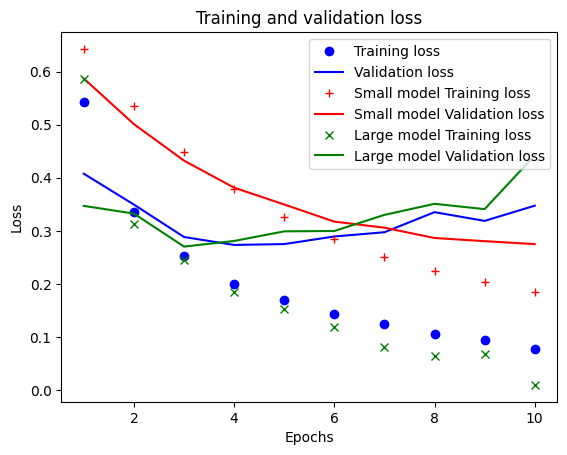

In [24]:


epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

plt.plot(epochs, s_loss_values, 'r+', label = 'Small model Training loss')
plt.plot(epochs, s_val_loss_values, 'r', label = 'Small model Validation loss')

plt.plot(epochs, L_loss_values, 'gx', label = 'Large model Training loss')
plt.plot(epochs, L_val_loss_values, 'g', label = 'Large model Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot the accutacy

In [16]:
print(history_dic)

{'loss': [0.5419967174530029, 0.33640536665916443, 0.2523552179336548, 0.19997423887252808, 0.16993755102157593, 0.14409750699996948, 0.12487606704235077, 0.10574282705783844, 0.09412072598934174, 0.07694219797849655], 'binary_accuracy': [0.7618666887283325, 0.8902666568756104, 0.9145333170890808, 0.9322666525840759, 0.9426666498184204, 0.9517999887466431, 0.9595333337783813, 0.9681333303451538, 0.972266674041748, 0.9798666834831238], 'val_loss': [0.40764862298965454, 0.34955957531929016, 0.2885286211967468, 0.27361416816711426, 0.27523407340049744, 0.28955352306365967, 0.297518789768219, 0.33530139923095703, 0.3188461363315582, 0.3474903702735901], 'val_binary_accuracy': [0.8658999800682068, 0.8535000085830688, 0.888700008392334, 0.8898000121116638, 0.8881999850273132, 0.8823000192642212, 0.880299985408783, 0.8784000277519226, 0.8809000253677368, 0.8748999834060669]}


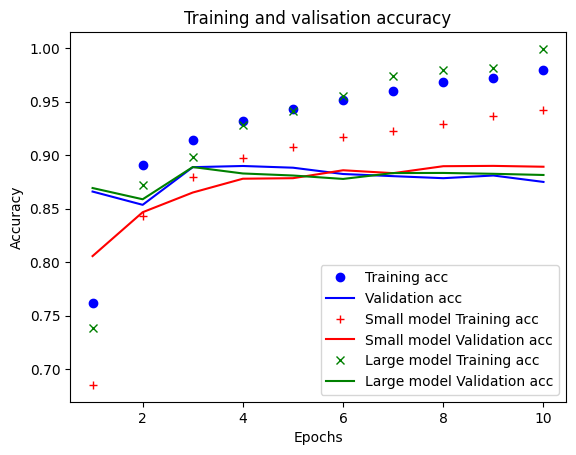

In [19]:
acc = history_dic['binary_accuracy']
val_acc = history_dic['val_binary_accuracy']

s_acc = s_history_dic['binary_accuracy']
s_val_acc = s_history_dic['val_binary_accuracy']

L_acc = L_history_dic['binary_accuracy']
L_val_acc = L_history_dic['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label= "Validation acc")

plt.plot(epochs, s_acc, 'r+', label = "Small model Training acc")
plt.plot(epochs, s_val_acc, 'r', label= "Small model Validation acc")

plt.plot(epochs, L_acc, 'gx', label = "Large model Training acc")
plt.plot(epochs, L_val_acc, 'g', label= "Large model Validation acc")

plt.title('Training and valisation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluate the model

In [21]:
result = model.evaluate(x_test, y_test)
Large = L_model.evaluate(x_test, y_test)
small = s_model.evaluate(x_test, y_test)
print(f'Original model: {result}')
print(f'Small model: {small}')
print(f'Large model: {Large}')

782/782 [==============================] - 1s 1ms/step - loss: 0.2897 - binary_accuracy: 0.8847
Original model: [0.37788161635398865, 0.8631200194358826]
Small model: [0.2896541655063629, 0.8846799731254578]
Large model: [0.4748411774635315, 0.8755599856376648]
